# Simple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 Read dataset

In [3]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Step 2 Perform basic data quality check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isna()

,RND,ADMIN,MKT,STATE,PROFIT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [11]:
df.duplicated().sum

<bound method Series.sum of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool>

### step 3 RND VS PROFIT MODEL

<Axes: xlabel='RND', ylabel='PROFIT'>

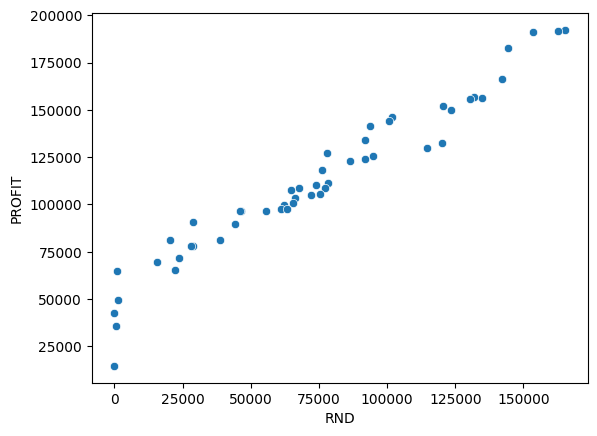

In [14]:
import seaborn as sns
sns.scatterplot(data = df,x='RND',y='PROFIT')

### PROFIT ~ RND (PROFIT dependent on RND)

In [16]:
X = df[['RND']]
Y = df[['PROFIT']]


In [17]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [18]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### Getting Slope and Intercept

In [20]:
model.intercept_

array([49032.89914125])

In [21]:
model.coef_

array([[0.85429137]])

### Profit_pred = 0.8543 * RND + 49032.89914125

### Evaluationg the model

In [22]:
# R@ score
model.score(X,Y)

0.9465353160804393

### With above I can say model has a good r2 score of 0.9465 > 0.8 hence model is good

In [26]:
# Predict the values of profit for given x
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [24]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [28]:
mse = mean_squared_error(Y,ypred)
mse

85120931.32706906

In [29]:
rmse = mse**(1/2)
rmse

9226.100548285232

In [30]:
mae = mean_absolute_error(Y,ypred)
mae

6910.98435457961

In [31]:
mape = mean_absolute_percentage_error(Y,ypred)
mape

0.11070141081984847

In [32]:
r2 = r2_score(Y,ypred)
r2

0.9465353160804393

### Visualizing the staright line

<Axes: xlabel='RND', ylabel='PROFIT'>

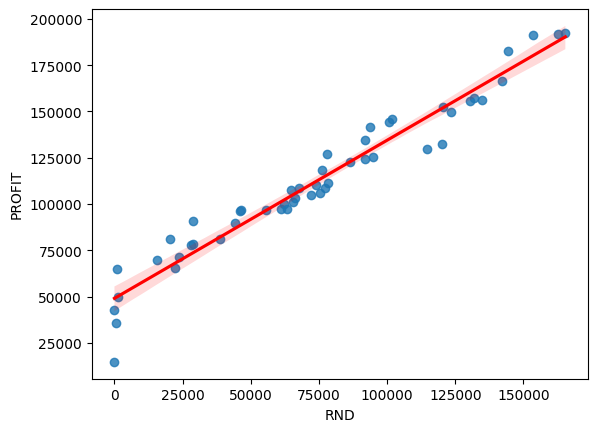

In [34]:
sns.regplot(data=df, x='RND',y='PROFIT',line_kws={'color':'red'})

### Out of sample predection

In [35]:
X.values

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [37]:
rnd_new = [[50000]]
model.predict(rnd_new)

array([[91747.46768819]])